# Electricity prices EDA

In [1]:
import os
print(f'Current working dir:\t {os.getcwd()}')
from pathlib import Path

from datetime import datetime
# from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib widget

Current working dir:	 c:\GitRepos\various-data-analysis\electricity-prices


Hot water daily consumption is 8.71 kWh per day.
Heater daily consumption is 43.20 kWh per day.
Heater consumption is 5.0 times more power-hungry.
Total consumption is 18946.54 kWh.


[Text(0, 0, '15768'), Text(0, 0, '3178.54'), Text(0, 0, '4927.5')]

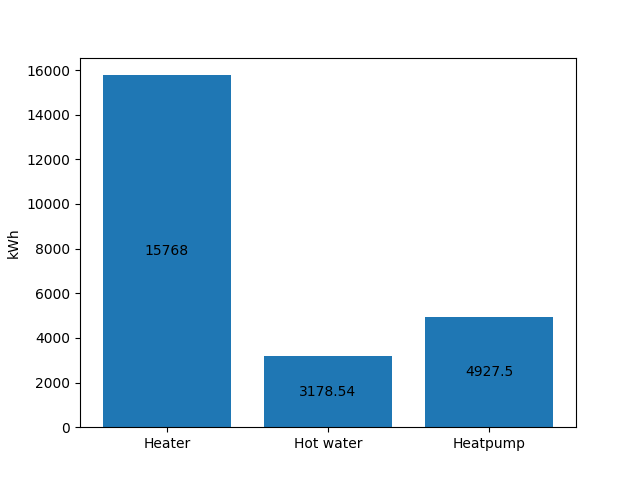

In [2]:
hot_water_person_day = 50  # kg
hot_water_temperature_dif = 50  # difference of deg C
num_persons = 3

hot_water_J_day = num_persons * hot_water_person_day * hot_water_temperature_dif * 4180
hot_water_kwh_day = hot_water_J_day / (3600 * 1000)
print(f'Hot water daily consumption is {hot_water_kwh_day:.2f} kWh per day.')

heater_err_margin = 1.2
num_heating_months = 4.5/12.
dissipation_kw_at_20_deg_diff = 4.
heater_kw = (num_heating_months * heater_err_margin * dissipation_kw_at_20_deg_diff)
heater_kwh_day = heater_kw * 24
print(f'Heater daily consumption is {heater_kwh_day:.2f} kWh per day.')
print(f'Heater consumption is {heater_kwh_day/hot_water_kwh_day:.1f} times more power-hungry.')

heater_yearly_kwh = 365* heater_kwh_day
hot_water_kwh_year = 365*hot_water_kwh_day
print(f'Total consumption is {heater_yearly_kwh+hot_water_kwh_year:.2f} kWh.')

heatpump_C = 3.2

fig, ax = plt.subplots()
bar1 = ax.bar(['Heater', 'Hot water', 'Heatpump'], [heater_yearly_kwh, hot_water_kwh_year, heater_yearly_kwh/heatpump_C])
ax.set_ylabel('kWh')
ax.bar_label(bar1, label_type='center')

## Heat Buffer
How much energy can a heat capacitor store.

Hot capacity per kg of water is 0.06 kWh.


Text(0, 0.5, 'kWh')

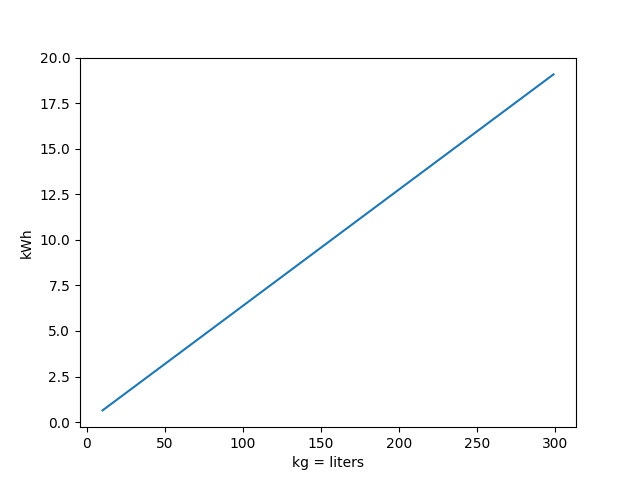

In [12]:
hot_capacity_temperature_dif = 65 - 10

hot_capacity_charge_Jperkg = hot_capacity_temperature_dif * 4180
hot_capacity_charge_kWhperkg = hot_capacity_charge_Jperkg / (3600 * 1000)

print(f'Hot capacity per kg of water is {hot_capacity_charge_kWhperkg:.2f} kWh.')

weight_range = np.arange(10, 300)

fig, ax = plt.subplots()
ax.plot(weight_range, hot_capacity_charge_kWhperkg * weight_range)
ax.set_xlabel('kg = liters')
ax.set_ylabel('kWh')

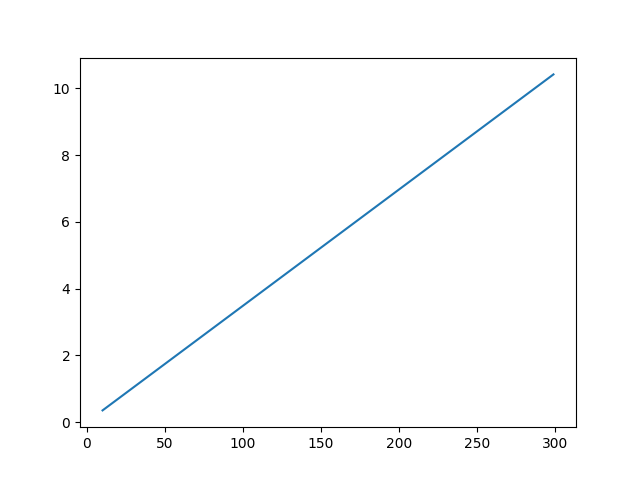